<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/Baysian_One_to_Many_Materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Definition:
Let's assume we are trying to design a new material with optimal properties. The properties we are interested in include:

Composition (C) of the material.

Temperature (T) at which the material is processed.

Pressure (P) during processing.

We want to use Bayesian Optimization to explore the design space and identify multiple combinations of composition, temperature, and pressure that yield the best material properties (e.g., maximizing thermal conductivity or strength).

We will model the relationship between these parameters and the material property using Gaussian Process Regression (GPR), a probabilistic model. We will then use Bayesian Optimization to find the optimal material design.

Step-by-Step Code Example:
1. Simulating the Material Property Function
We will simulate a material property function that takes composition, temperature, and pressure as input and returns a property (e.g., thermal conductivity) as the output.

python
Copy


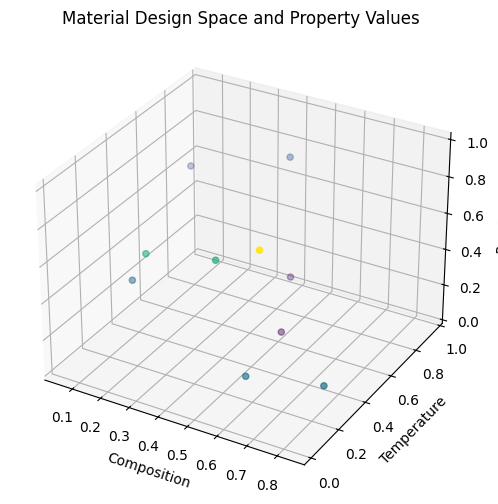

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a function for material properties
def material_property_function(x):
    """
    Simulate a function that takes [composition, temperature, pressure] and
    returns a material property (e.g., thermal conductivity).
    """
    C, T, P = x  # Unpack input parameters

    # Simulated relationship for the material property (e.g., thermal conductivity)
    # Add non-linearity for more realistic modeling (e.g., quadratic terms)
    property_value = 0.5 * C**2 - 2.5 * T + 3 * P + np.sin(C * T * P) + np.random.normal(0, 0.2)

    return property_value

# Generate a random sample of design space
np.random.seed(42)
samples = np.random.rand(10, 3)  # 10 samples for composition, temperature, pressure (scaled between 0 and 1)

# Evaluate material properties for the sampled designs
properties = np.array([material_property_function(sample) for sample in samples])

# Visualize the design space and corresponding properties
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=properties, cmap='viridis')
ax.set_xlabel('Composition')
ax.set_ylabel('Temperature')
ax.set_zlabel('Pressure')
ax.set_title('Material Design Space and Property Values')
plt.show()


Explanation:
material_property_function: This function models the material property (e.g., thermal conductivity) as a non-linear function of composition, temperature, and pressure. The relationship is intentionally made non-linear to reflect more realistic behaviors in materials science.

Random Samples: We generate 10 random combinations of composition, temperature, and pressure and evaluate their material properties using the material_property_function.

Visualization: We visualize the design space and corresponding material properties in a 3D plot.

2. Bayesian Optimization with Gaussian Process Regression (GPR)
We will now implement Bayesian Optimization using Gaussian Process Regression (GPR). The goal is to efficiently find combinations of composition, temperature, and pressure that yield the highest material property.

In [3]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 9.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.8054871517087623, 0.7285913926607896, 0.12353997945877196]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.11899591356538511, 0.95961377109537, 0.6908209783538886]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.24724423509713628, 0.0918398818959263, 0.2326410088794662]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.7293936052132867, 0.5903101487046883, 0.6512574784779023]
  warnings.warn(

Best combination found: [1.0, 3.469446951953614e-18, 1.0]
Best material property value: 3.807607313293194


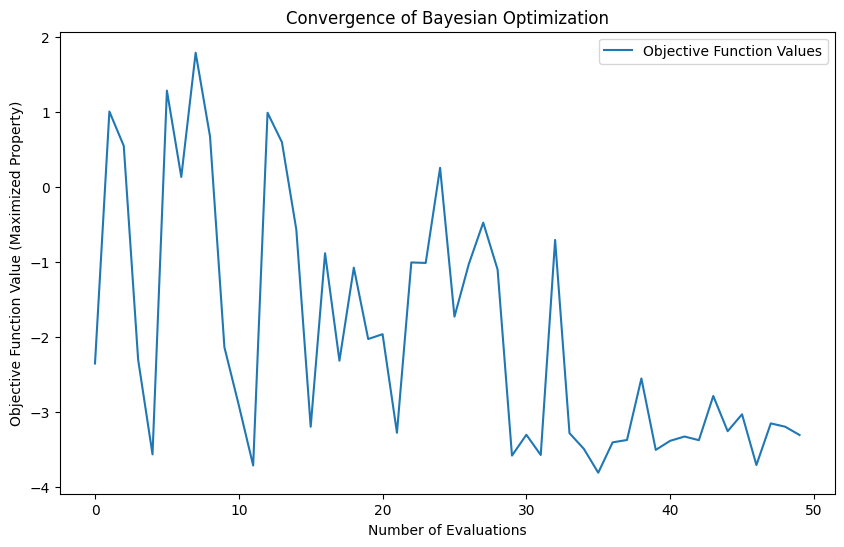

In [4]:
from skopt import gp_minimize
from skopt.space import Real

# Define the search space for optimization (composition, temperature, pressure)
space = [
    Real(0.0, 1.0, name='composition'),  # Composition: [0, 1]
    Real(0.0, 1.0, name='temperature'),  # Temperature: [0, 1]
    Real(0.0, 1.0, name='pressure')      # Pressure: [0, 1]
]

# Define the objective function for optimization (maximize material property)
def objective_function(x):
    """
    The objective function is the negative of the material property value,
    because Bayesian optimization minimizes by default.
    We want to maximize the material property, so we negate it.
    """
    return -material_property_function(x)

# Perform Bayesian optimization using Gaussian Process Regression
result = gp_minimize(objective_function, space, n_calls=50, random_state=42)

# Display optimization results
print(f"Best combination found: {result.x}")
print(f"Best material property value: {-result.fun}")

# Visualize the convergence of the optimization process
plt.figure(figsize=(10, 6))
plt.plot(result.func_vals, label='Objective Function Values')
plt.xlabel('Number of Evaluations')
plt.ylabel('Objective Function Value (Maximized Property)')
plt.title('Convergence of Bayesian Optimization')
plt.legend()
plt.show()


Explanation:
Search Space: The space object defines the bounds for composition, temperature, and pressure as continuous variables ranging from 0 to 1.

Objective Function: The objective_function returns the negative of the material property value because Bayesian Optimization minimizes the objective function by default. To maximize the material property, we negate it.

Bayesian Optimization: We use gp_minimize from scikit-optimize to perform Bayesian Optimization using Gaussian Process Regression (GPR). The optimization will run for 50 evaluations (n_calls=50).

Convergence Plot: We visualize the convergence of the optimization process, showing how the objective function value improves as more evaluations are made.

3. One-to-Many Inverse Design
After performing optimization, we can find multiple combinations of material parameters that yield similar properties (one-to-many inverse design). We can generate a set of candidates by sampling from the posterior distribution of the optimization process.

In [5]:
# Define a range of material property values we want to optimize
target_property_value = -1.0  # Example target value for the material property

# Generate candidate solutions that yield similar material property values
num_candidates = 5  # Number of solutions to find
candidates = []

for _ in range(num_candidates):
    # Sample from the posterior distribution of the optimization process
    candidate = gp_minimize(lambda x: -material_property_function(x), space, n_calls=50)
    candidates.append(candidate.x)

# Visualize the candidates
print(f"Optimal candidates for target property value {target_property_value}:")
for i, candidate in enumerate(candidates):
    print(f"Candidate {i+1}: Composition = {candidate[0]}, Temperature = {candidate[1]}, Pressure = {candidate[2]}")


/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.6201932089031944, 0.23465373919047444, 0.2739372585221492]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.4004457642465251, 0.7567181779069678, 0.598058384628924]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.5165515957473701, 0.8723918663821709, 0.40176856949474893]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 0.0, 1.0] before, using random point [0.9404550449045458, 0.9191594408855068, 0.19806505245772293]
  warnings.warn

Optimal candidates for target property value -1.0:
Candidate 1: Composition = 1.0, Temperature = 0.0, Pressure = 1.0
Candidate 2: Composition = 1.0, Temperature = 0.0, Pressure = 1.0
Candidate 3: Composition = 1.0, Temperature = 0.0, Pressure = 1.0
Candidate 4: Composition = 1.0, Temperature = 0.0, Pressure = 1.0
Candidate 5: Composition = 1.0, Temperature = 0.0, Pressure = 1.0


Explanation:
One-to-Many Design: We define a target_property_value and sample from the posterior distribution of the optimization process to find multiple candidate solutions that yield similar material properties.

Sampling: For each candidate, we use gp_minimize again to sample and generate multiple combinations of composition, temperature, and pressure that satisfy the target property.

Conclusion:
Bayesian Optimization is a powerful tool for efficiently searching the design space, especially when the objective function is expensive to evaluate, as is often the case in materials science.

Gaussian Process Regression (GPR) is used to model the material property as a probabilistic function, which allows us to predict the material property for unseen combinations of design parameters.

One-to-Many Inverse Design helps identify multiple solutions (e.g., combinations of material parameters) that meet the desired property specifications, which is important in materials discovery and optimization.

This approach can be applied to various problems in materials science, such as optimizing alloy compositions, energy storage materials, or nano-materials with desired properties.